In [3]:
%matplotlib notebook
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pyproj

import verde as vd
import pooch

from scipy.interpolate import griddata

In [14]:
cols= 'UC1,CTC1,KC1,THC1,MAGR1,dem1,Selected,X,Y,SVM,SVM (APPGMch),SVM (APPGMga),SVM (APPGMgb),SVM (APPGMgg),SVM (APPGMgm),SVM (APPGMgn),SVM (APPGMhb),SVM (APPGMhs),SVM (APPGMmh),SVM (APPGMq),SVM_APPGMsg,SVM (APPMGhs),SVM (NPcs),SVM (PPGAgn),SVM (Qa)'.split(',')

PSg_RF = pd.read_csv('../output_orange/SVM_scrr',
                        names = cols,
                        delim_whitespace = False,
                        usecols = ['X','Y','SVM_APPGMsg'],
                        skiprows=1)

In [15]:
PSg_RF

,X,Y,SVM_APPGMsg
0,310024.0,7.509997e+06,1.231384e-14
1,310024.0,7.509747e+06,1.187905e-14
2,310024.0,7.509497e+06,1.198313e-14
3,310024.0,7.509247e+06,1.218938e-14
4,310024.0,7.508997e+06,1.496589e-14
...,...,...,...
26240,346005.0,7.466001e+06,6.235382e-01
26241,346005.0,7.465751e+06,5.668937e-01
26242,346005.0,7.465501e+06,4.755251e-01
26243,346005.0,7.465251e+06,3.219668e-01


/home/grl/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


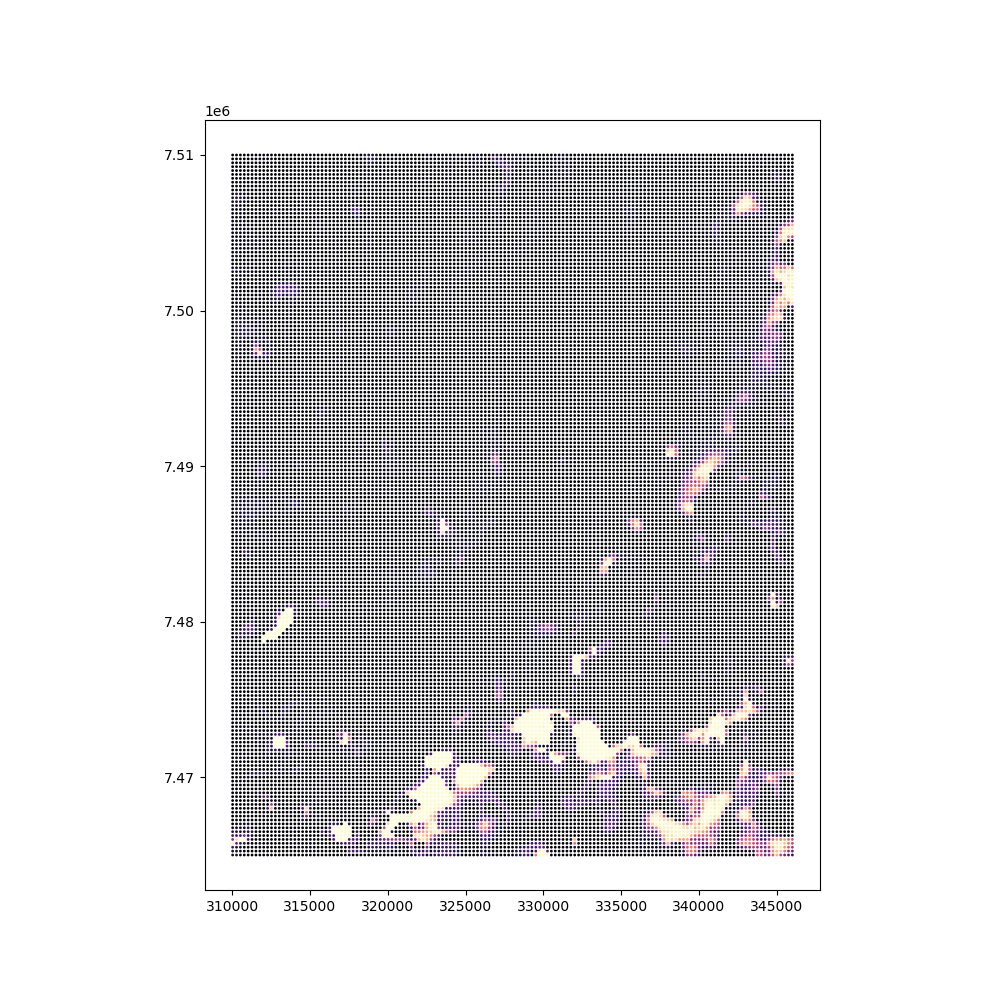

(308224.95, 347804.05, 7462751.2, 7512246.8)

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(PSg_RF.X,PSg_RF.Y,
           c=PSg_RF.SVM_APPGMsg,
           cmap='magma',
           s=1)
plt.axis('scaled')

In [17]:
points = PSg_RF[['Y', 'X']].values
values = np.array(PSg_RF.iloc[:, 2])

In [22]:
xv = np.linspace(PSg_RF.X.min(), PSg_RF.X.max(), 500)
yv = np.linspace(PSg_RF.Y.max(), PSg_RF.Y.min(), 500)

grid_y, grid_x = np.meshgrid(yv, xv, indexing = 'ij')

In [23]:
grid_ = griddata(points, values, (grid_y, grid_x), method = 'cubic')

<IPython.core.display.Javascript object>


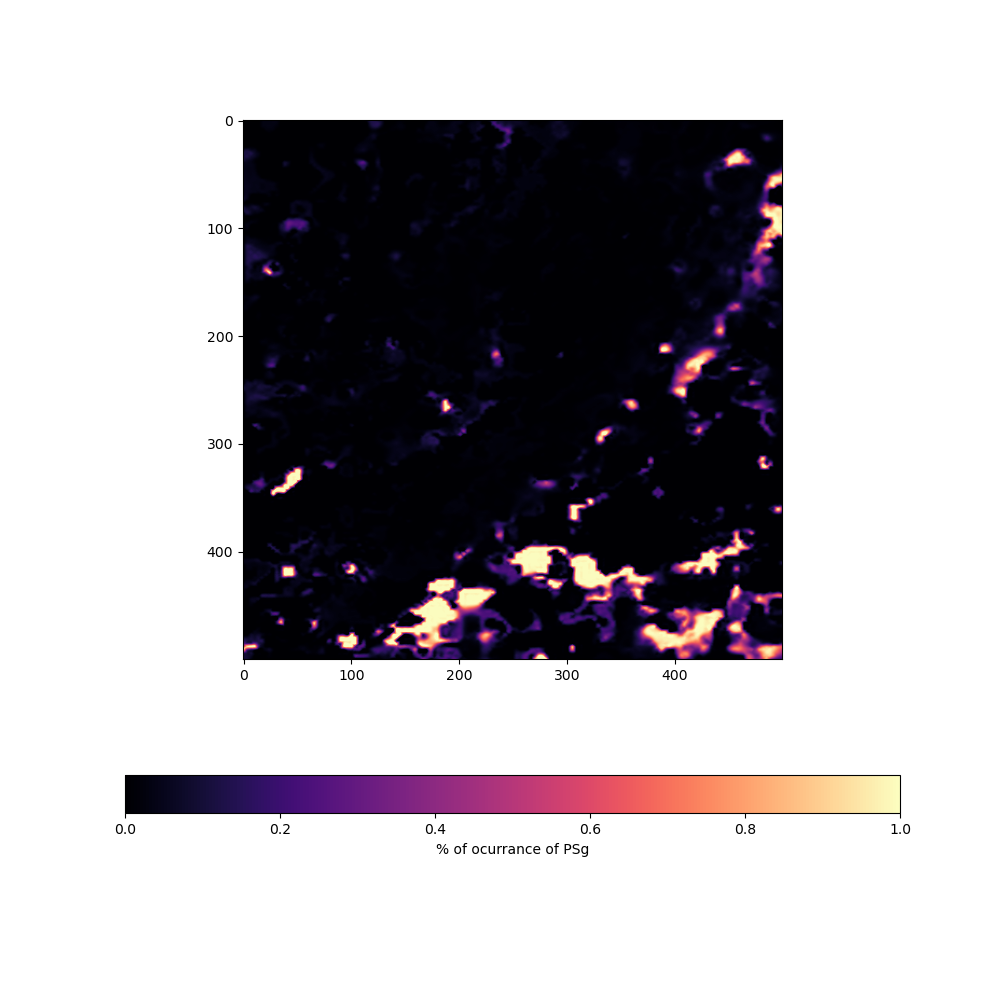

In [24]:
plt.figure(figsize = (10, 10))
plt.imshow(grid_, cmap = 'magma',vmin=0,vmax=1)
plt.colorbar(label = u'% of ocurrance of PSg', orientation = 'horizontal')
plt.savefig('cubic_interp', dpi = 400, bbox_inches = 'tight')